Alguna vez, todos nos hemos preguntado, ¿cuántos somos en el mundo? Desafortunadamente en nuestra vida diaria podemos conocer a un número muy limitado de personas, pero precisamente por eso es interesante entender cuántas otras personas además de nosotros viven en este planeta. Pero también, ¿cuáles son los países más grandes del mundo?  ¿la mayor superficie significa que esos países también son los más poblados o hay algo más que afecta la cantidad de personas presentes en un país?, hay muchas preguntas, las cuales hemos resulto solo algunas en este proyecto.

IMPORTAMOS LAS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

LEEMOS EL CSV & SE GUARDA EN UN DATAFRAME

In [2]:
df = pd.read_csv('../../Data/FuentesOriginales/USAR/2021_population.csv')
df.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,065,329","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,401,310,563","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"334,058,426","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"278,037,263","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,724,796","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


VERIFICAMOS LOS NULOS

In [3]:
df.isnull().sum()

iso_code             0
country              0
2021_last_updated    0
2020_population      0
area                 0
density_sq_km        0
growth_rate          0
world_%              0
rank                 0
dtype: int64

VERIFICAMOS LAS COLUMNAS

In [4]:
df.columns

Index(['iso_code', 'country', '2021_last_updated', '2020_population', 'area',
       'density_sq_km', 'growth_rate', 'world_%', 'rank'],
      dtype='object')

ELIMINAMOS LA COLUMNA QUE NO USAREMOS

In [5]:
df.drop('iso_code', axis=1, inplace=True)

ELIMINAMOS LAS COMAS

In [6]:

def replace(data, col_name):
    data[col_name] = data[col_name].str.replace(',' , '')
    data[col_name] = data[col_name].str.replace("sq_km", "")
    data[col_name] = data[col_name].str.replace("%", "")
    data[col_name] = pd.to_numeric(data[col_name])

replace(df, '2021_last_updated')
replace(df, '2020_population')
replace(df, 'area')
replace(df, 'growth_rate')
replace(df, 'world_%')

VERIFICAMOS

In [7]:
df

,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,China,1447065329,1439323776,9706961,149/sq_km,0.34,18.34,1
1,India,1401310563,1380004385,3287590,424/sq_km,0.97,17.69,2
2,United States,334058426,331002651,9372610,36/sq_km,0.58,4.23,3
3,Indonesia,278037263,273523615,1904569,145/sq_km,1.04,3.51,4
4,Pakistan,227724796,220892340,881912,255/sq_km,1.95,2.86,5
...,...,...,...,...,...,...,...,...
219,Montserrat,4977,4992,102,49/sq_km,-0.30,0.00,228
220,Falkland Islands,3533,3480,12173,0/sq_km,1.52,0.00,229
221,Niue,1619,1626,260,6/sq_km,-0.43,0.00,230
222,Tokelau,1373,1357,12,114/sq_km,1.18,0.00,231


UBICAMOS EL TOP 10 DE LOS PAISES CON MAYOR POBLACION & SU AREA GEOGRAFICA


In [8]:
large_pop = df.nlargest(10, 'area')

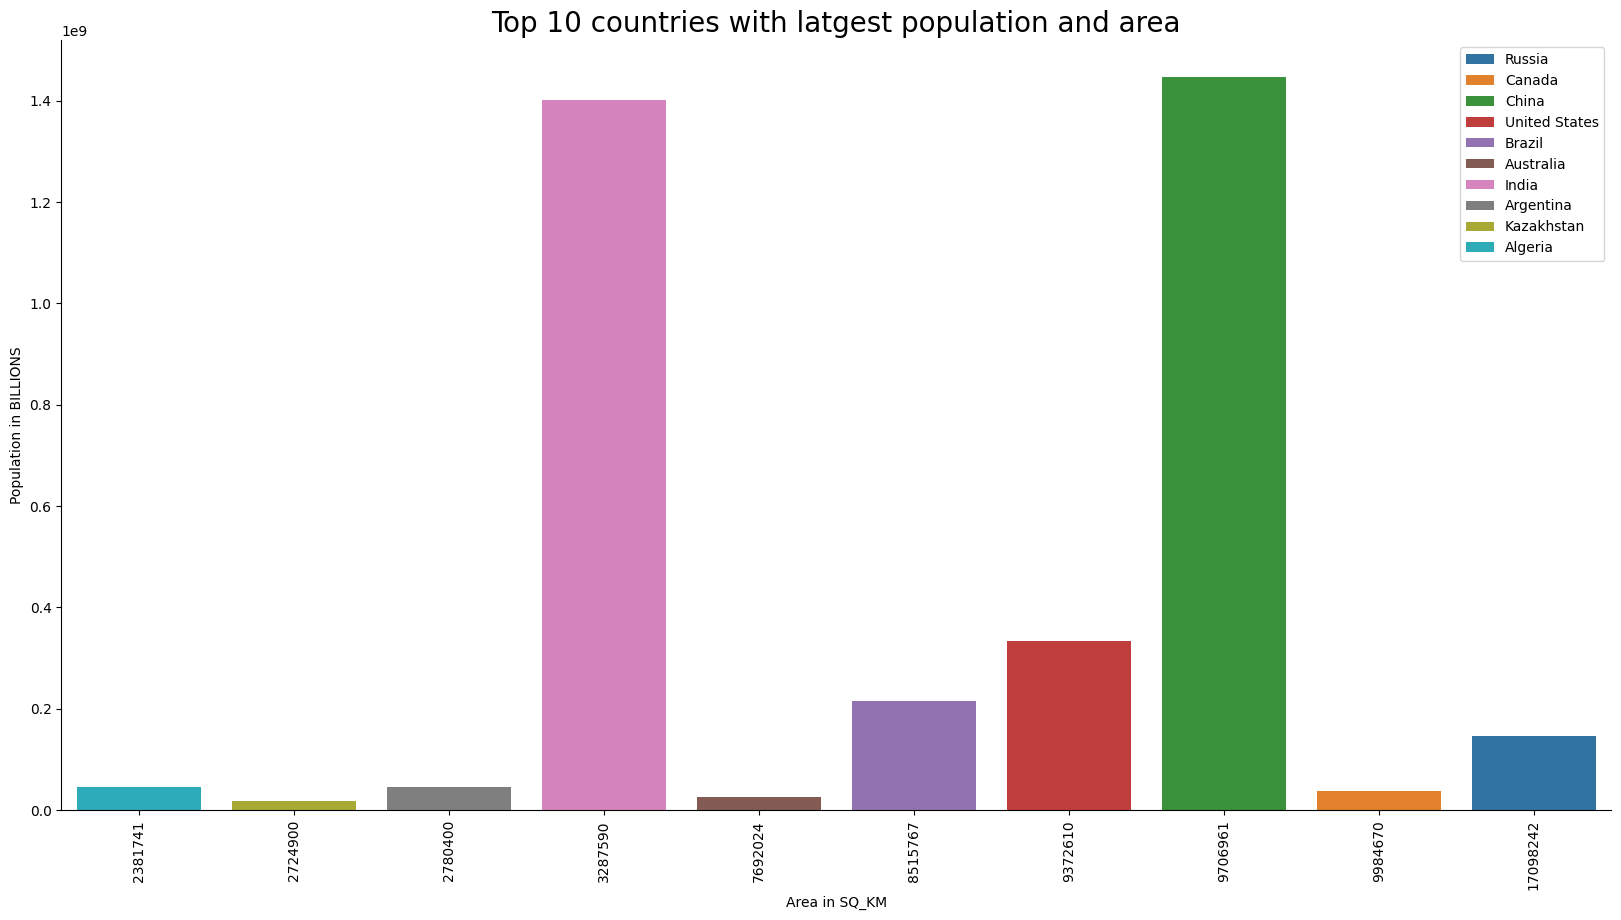

In [9]:
g = sns.barplot(data=large_pop, x = 'area', y= '2021_last_updated', hue='country', dodge= False)#, kind='bar')
g.figure.set_size_inches(20,10)
g.set_ylabel('Population in BILLIONS', size=10)
g.set_xlabel('Area in SQ_KM', size=10)
plt.legend(loc='upper right')
sns.despine()
plt.xticks(rotation = 'vertical')
plt.title('Top 10 countries with latgest population and area' , size=20)
plt.show()

UBICAMOS EL TOP 10 DE PAISES DE MAYOR & MENOR POBLACION

In [10]:
top_10_country_pop = df[:10]
least_10_country_pop = df[-10:]

In [11]:
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x= top_10_country_pop['country'],
    y= top_10_country_pop['2021_last_updated'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='The 10 most populated countries in the world')

** PENDIENTE CARGAR MAPA DE CHINA Y SU POBLACION

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear una figura y un eje
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Agregar características del mapa
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Agregar límites de la provincia de China
china = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    facecolor='none')
ax.add_feature(china, edgecolor='black')

# Agregar datos de la densidad poblacional de la provincia de China
china_pop = gpd.read_file('path/to/china_pop.shp')
ax.scatter(
    china_pop.geometry.x,
    china_pop.geometry.y,
    c=china_pop['population_density'],
    cmap='YlOrRd',
    transform=ccrs.PlateCarree())

# Añadir título y etiquetas del eje
ax.set_title('Densidad poblacional en China')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


Como podemos ver China es el país más poblado, pero si nos fijamos en la imagen de arriba podemos ver que la mayoría de la gente vive en la zona de Oriente Medio. Creo que es así porque en la parte occidental de China hace mucho frío ya que está cerca de las montañas del Himalaya, por lo que los pueblos antiguos se asentaron en el este, por lo que las ciudades más grandes de China, como la capital, Beijing, están cerca de la costa. 

In [12]:
colors = ['blue'] * 10
colors[9] = 'skyblue'

fig = go.Figure(data=[go.Bar(
    x= least_10_country_pop['country'],
    y= least_10_country_pop['2021_last_updated'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='The 10 least populated countries in the world ')

** PENDIENTE CARGAR MAPA DE LAS ISLAS MALVINAS

Mientras que, como era de esperar, los países menos poblados son también los que tienen menos territorios. Precisamente el país menos poblado del mundo son las Islas Malvinas, unas pequeñas islas que se encuentran (como podemos ver en la imagen superior) al sur de América Latina. Probablemente ya hayas oído hablar de estas islas ya que fueron escenario de peleas muy violentas entre argentinos y británicos en 1982

UBICAMOS EL TOP 10 DE PAISES CON MAYOR TASA DE CRECIMIENTO
Y VISUALIZAMOS CON PIEPLOT

In [13]:
top_count = df.nlargest(10, 'growth_rate')

In [14]:
fig = px.pie(top_count, names= 'country', values= 'growth_rate', color= 'country')
fig.update_layout(title_text ='Top 10 counties with highest growth rate')
fig.show()

Inesperadamente, Siria es el país con la tasa de crecimiento más alta. A pesar de la constante posibilidad de guerras y enfrentamientos con otros paises.

UBICAMOS EL TOP 10 DE PAISES CON LA MENOS TASA DE CRECIMIENTO

In [15]:
growth = df.sort_values(by = 'growth_rate', ascending = False)

In [16]:
top_10_country_growth = growth[:10]
least_10_country_growth = growth[-10:]

In [17]:
colors = ['red'] * 10
colors[9] = 'skyblue'

fig = go.Figure(data=[go.Bar(
    x= least_10_country_growth['country'],
    y= least_10_country_growth['growth_rate'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='The 10 countries with the lowest growth rate')

Mientras que, como podemos ver en el gráfico, Lituania es el país con la tasa de crecimiento más baja. Incluso es negativo, lo que quiere decir que lamentablemente no hay mucha inmigración o hay más muertes que nacimientos.

UBICAMOS LOS 10 PRINCIPALES PAISES Y SU CONTRIBUCION A LA POBLACION MUNDIAL

In [18]:
contri = df.nlargest(10, 'world_%')

In [19]:
fig = px.pie(contri, names= 'country', values= 'world_%', color= 'country')
fig.update_layout(title_text= 'Top 10 countries and their contribution to world population')
fig.show()

VISUALIZAMOS EN EL MAPA MUNDIAL

In [20]:

fig = px.choropleth(contri , locations = 'country',
                locationmode= 'country names', color='country'
                , projection = 'natural earth'
                )
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
        ),
        width=800,
        height=400,
title_text = 'Location of countries on the world map',
title_y=0.98

)

Como habíamos visto anteriormente, China, India y Estados Unidos son los estados más poblados e incluso suman el 52,63% de la población mundial, o más de la mitad.